# Generate Figures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
DIR = "/workspace/nflbigdatabowl2023"
sys.path.append(DIR)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
from IPython.display import display

from src.visualization.interactive_pocket_area import (
    get_frame_plotter,
    get_play_pocket_and_timeline_plotter,
    get_play_pocket_and_timeline_plotter_multiple,
)
from src.visualization.formations import (
    plot_area_distributions,
    get_all_formation_distributions_plotter,
    get_clean_play_data,
    get_formation_distribution_plotter,
    get_play_metrics_with_area_data,
)
from src.visualization.helpers import unsnake
from src.visualization.logos import get_team_logos
from src.visualization.scatter import (
    get_team_scatter_plotter,
    get_team_scatter_ranker,
    plot_rankings
)

In [4]:
FIGPATH = "/workspace/nflbigdatabowl2023/data/figures"

In [5]:
team_logos = get_team_logos()

In [6]:
df_plays = pd.read_csv(f"{DIR}/data/raw/plays.csv")
df_plays = get_clean_play_data(df_plays)
df_tracking = pd.read_csv(f"{DIR}/data/processed/tracking_display.csv")
df_play_metrics = pd.read_csv(f"{DIR}/data/processed/play_metrics.csv")
df_play_metrics = get_play_metrics_with_area_data(df_play_metrics, df_plays)
df_areas = pd.read_csv(f"{DIR}/data/processed/pocket_areas.csv")
df_areas["pocket"] = df_areas["pocket"].apply(literal_eval)

## Figures

### Introduction

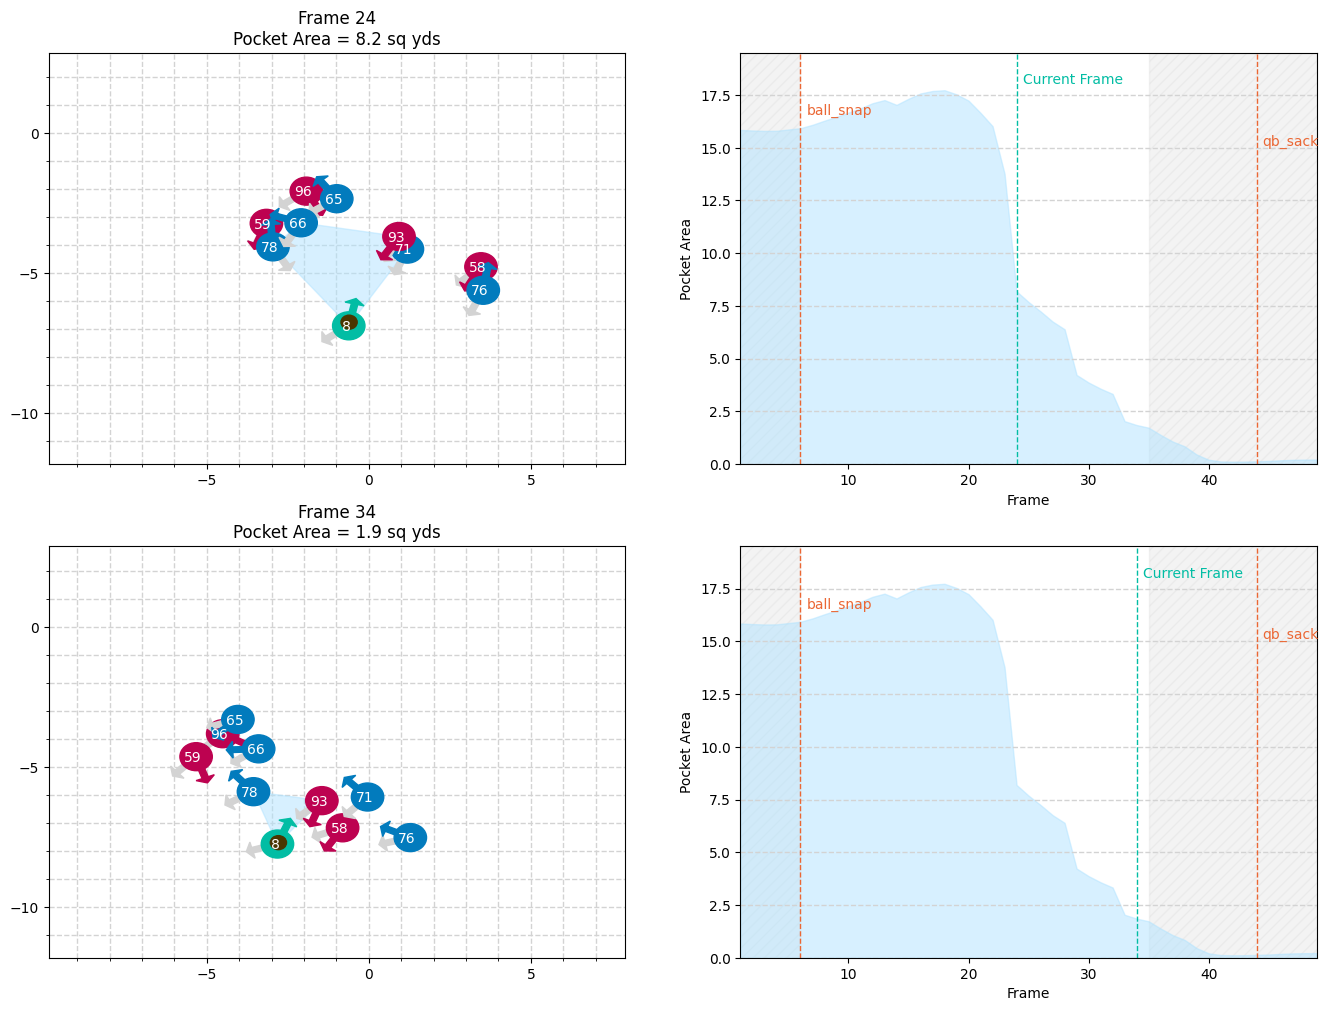

In [7]:
default_area = "adaptive_pocket_area"
play_query = "gameId == 2021091212 and playId == 421"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method=default_area)
plt.gcf().savefig(f"{FIGPATH}/figure_01.png")
plt.show()

### Voronoi

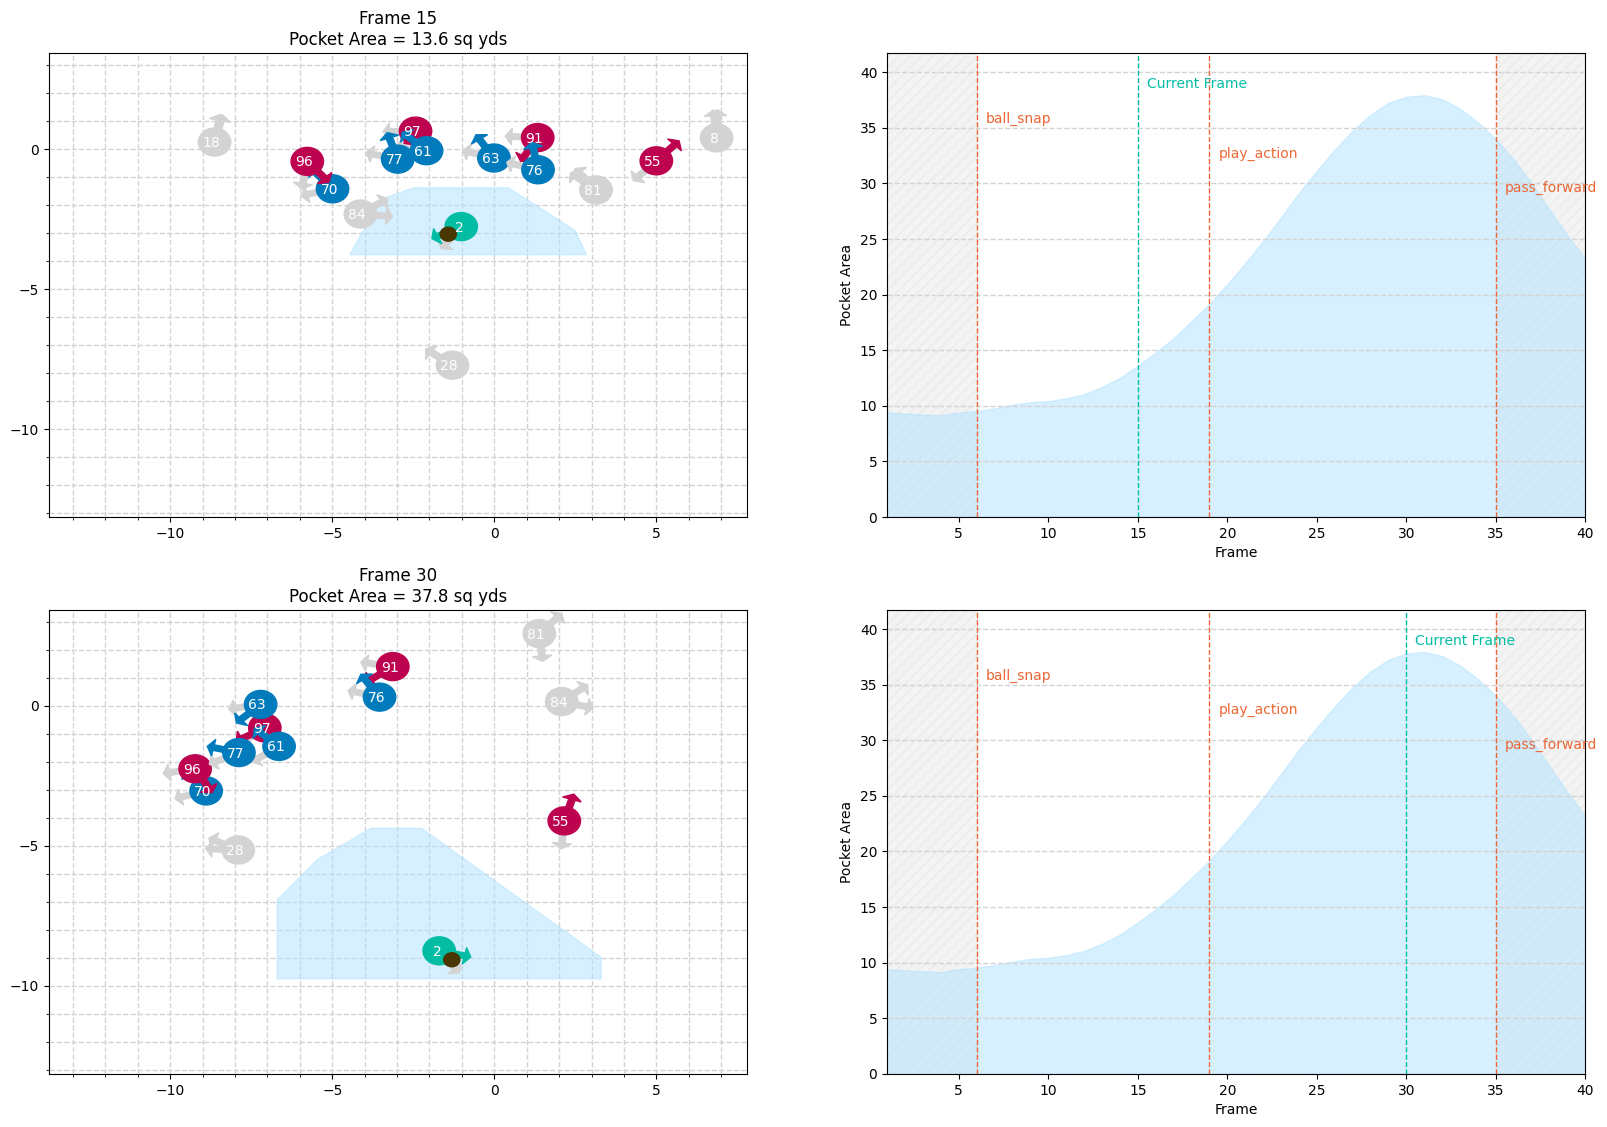

In [8]:
play_query = "gameId == 2021091200 and playId == 122"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=15, frame1=30, area_method="voronoi_rushers_only")
plt.gcf().savefig(f"{FIGPATH}/figure_02.png")
plt.show()

### Adaptive

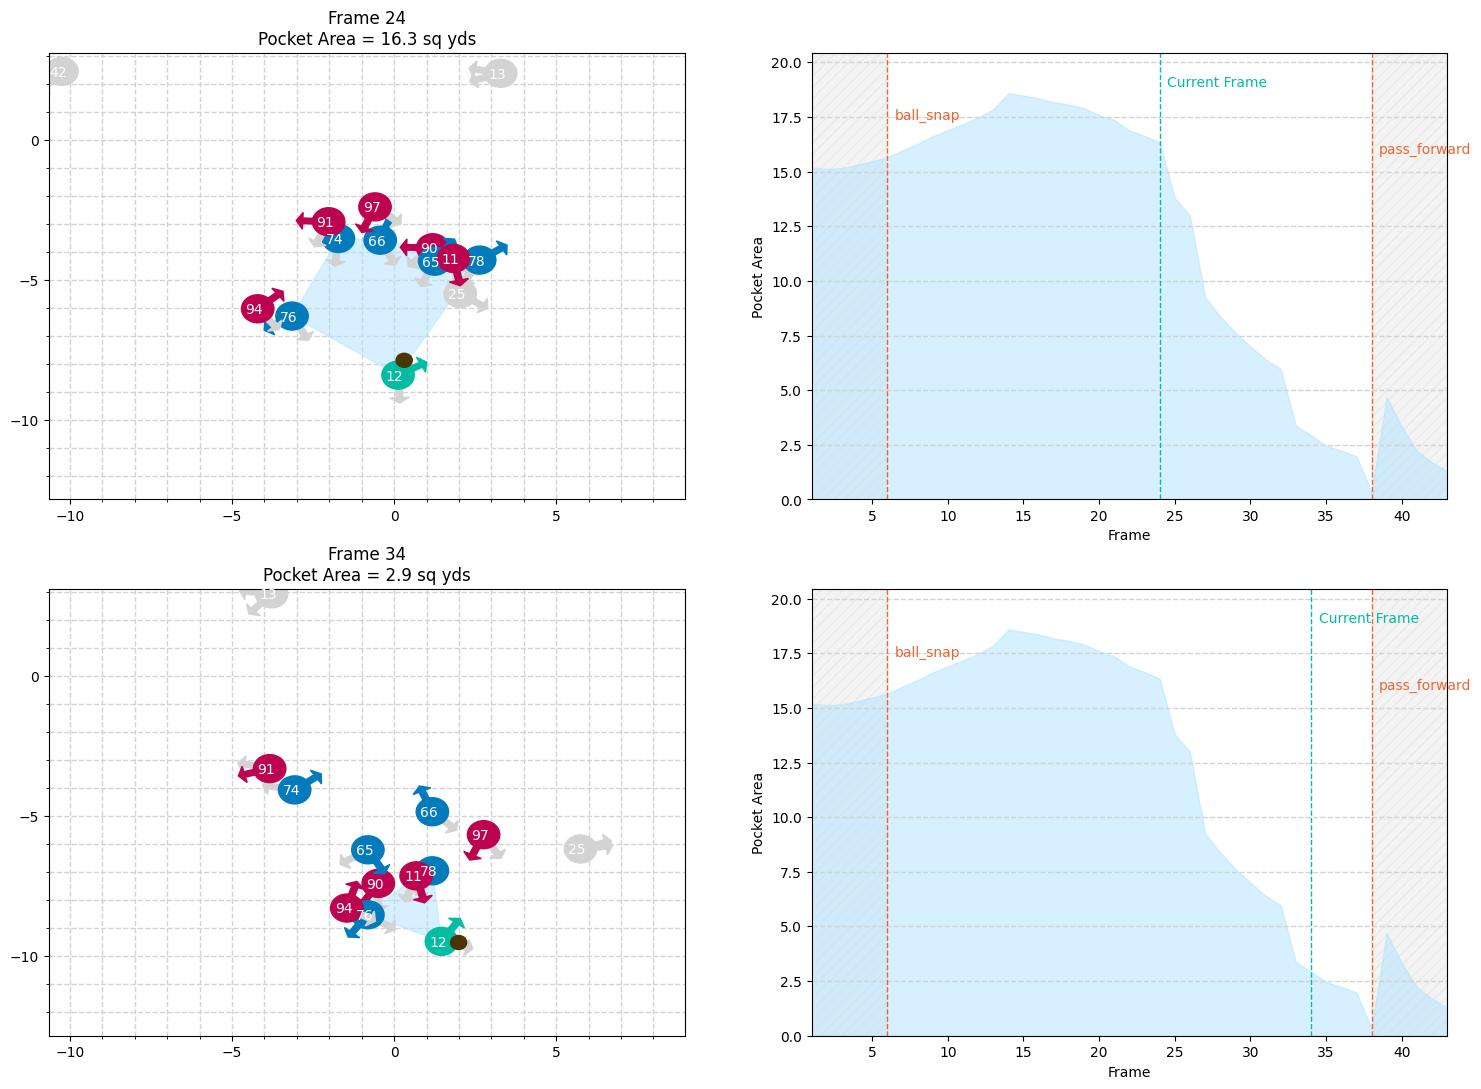

In [9]:
play_query = "gameId == 2021090900 and playId == 97"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method="adaptive_pocket_area")
plt.gcf().savefig(f"{FIGPATH}/figure_03.png")
plt.show()

### Team Rankings

In [10]:
default_area = "adaptive_pocket_area"
formation_query = "'SHOTGUN', 'EMPTY', 'SINGLEBACK', 'I FORM'"
rank_team_scatter = get_team_scatter_ranker(df_play_metrics)
plot_team_scatter = get_team_scatter_plotter(df_play_metrics, team_logos)
df_team_ranking = rank_team_scatter(default_area, formation_query)
display(df_team_ranking)

,rank,team,plays,median_area,median_time_in_pocket,sack_rate,plays_opponent,median_area_opponent,median_time_in_pocket_opponent,sack_rate_opponent
0,1,PIT,235,13.073900,2.4,0.055319,240,10.821325,2.6,0.079167
1,2,TB,299,12.515700,2.6,0.040134,302,10.059150,2.6,0.049669
2,3,KC,320,12.139935,2.7,0.043750,236,10.459250,2.8,0.042373
3,4,LA,245,12.085650,2.8,0.028571,312,11.794925,2.6,0.076923
4,5,GB,216,11.518950,2.7,0.078704,269,10.293650,2.7,0.070632
5,6,NYG,289,11.433900,2.7,0.051903,270,11.230225,2.8,0.059259
6,7,SEA,225,11.269200,2.6,0.097778,296,10.147350,2.8,0.050676
7,8,HOU,227,11.142750,2.6,0.088106,214,10.451030,2.8,0.060748
8,9,CHI,244,11.072125,2.7,0.118852,235,10.741050,2.8,0.085106
9,10,LAC,250,10.918572,2.7,0.052000,207,9.336650,2.9,0.062802


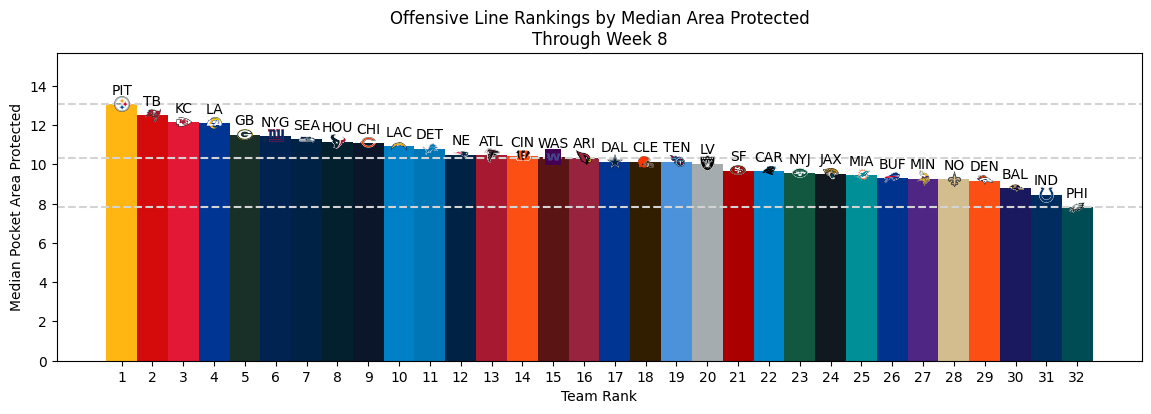

In [12]:
plot_rankings(df_team_ranking, team_logos, "median_area", ascending=False)
plt.gca().set_ylabel("Median Pocket Area Protected")
plt.gca().set_title(f"Offensive Line Rankings by Median Area Protected\nThrough Week 8")
plt.gcf().savefig(f"{FIGPATH}/figure_04.png")
plt.show()

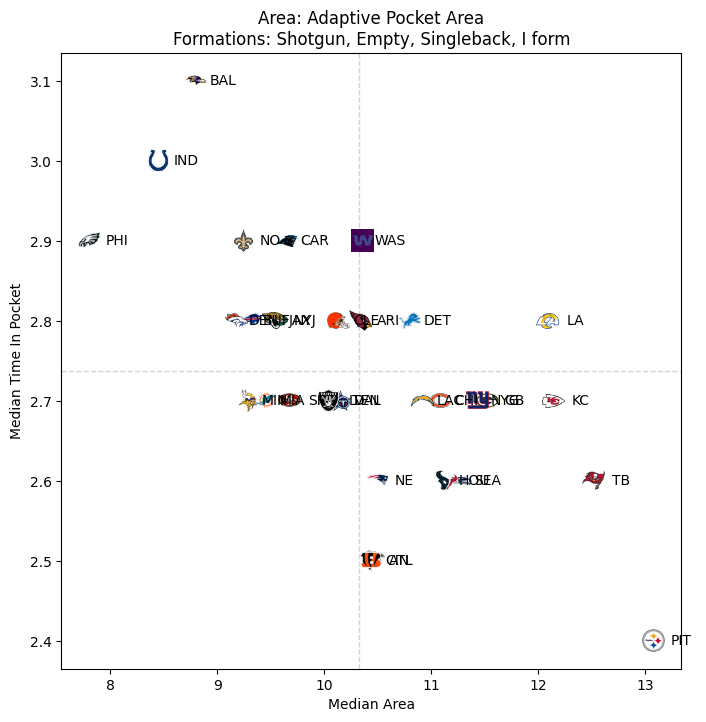

In [29]:
plot_team_scatter(default_area, formation_query, "median_area", "median_time_in_pocket")
plt.gcf().savefig(f"{FIGPATH}/figure_05.png")
plt.show()

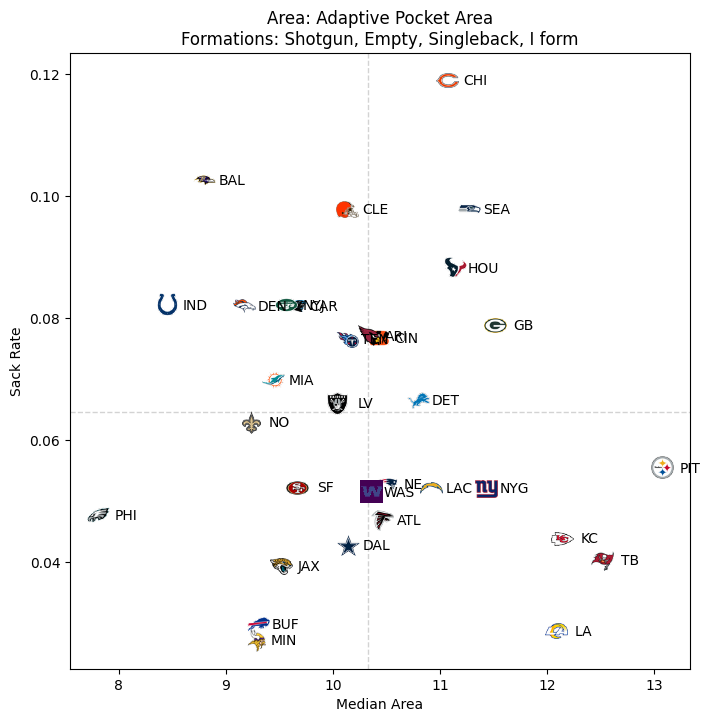

In [14]:
plot_team_scatter(default_area, formation_query, "median_area", "sack_rate")
plt.gcf().savefig(f"{FIGPATH}/figure_06.png")
plt.show()

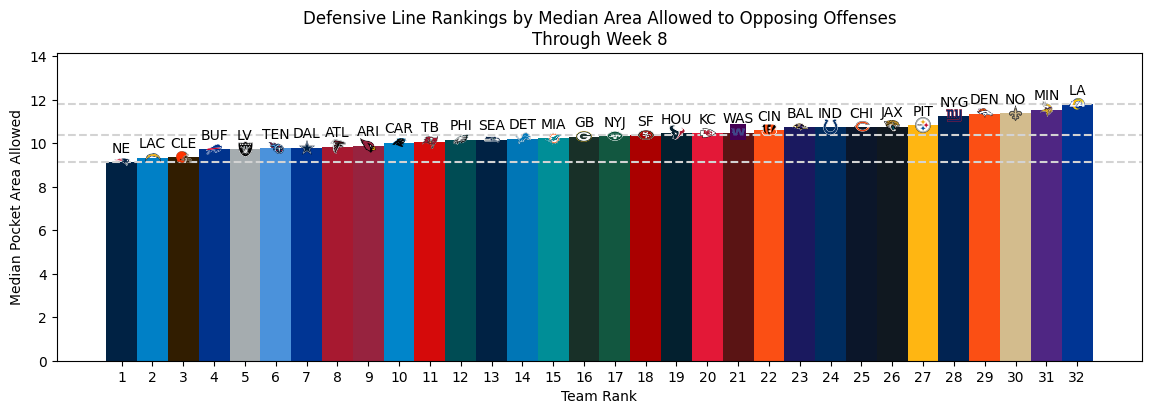

In [15]:
plot_rankings(df_team_ranking, team_logos, "median_area_opponent", ascending=True)
plt.gca().set_ylabel("Median Pocket Area Allowed")
plt.gca().set_title(f"Defensive Line Rankings by Median Area Allowed to Opposing Offenses\nThrough Week 8")
plt.gcf().savefig(f"{FIGPATH}/figure_07.png")
plt.show()

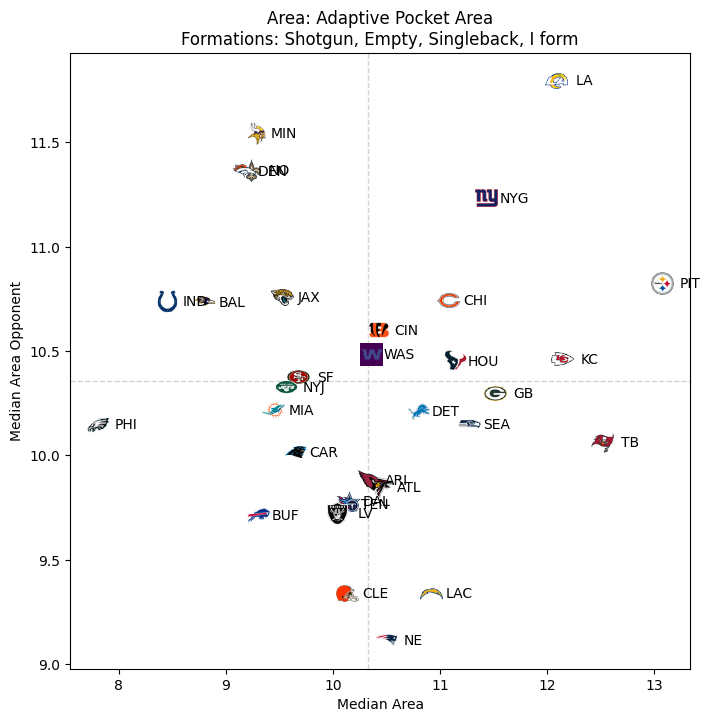

In [16]:
plot_team_scatter(default_area, formation_query, "median_area", "median_area_opponent")
plt.gcf().savefig(f"{FIGPATH}/figure_08.png")
plt.show()

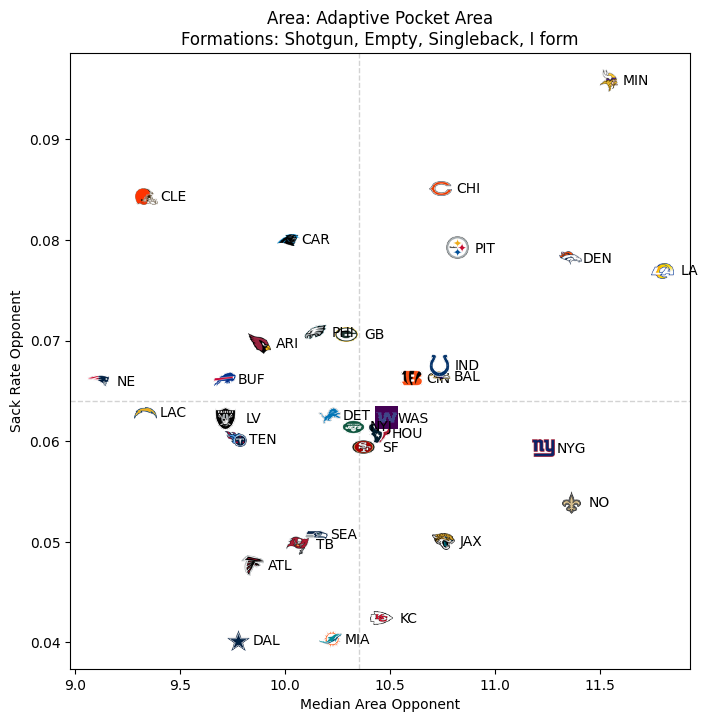

In [27]:
plot_team_scatter(default_area, formation_query, "median_area_opponent", "sack_rate_opponent")
plt.gcf().savefig(f"{FIGPATH}/figure_09.png")
plt.show()

### Heatmaps

In [17]:
from matplotlib.patches import Polygon as PolygonPatch
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.metrics.pocket_area.helpers import vertices_from_shape
from src.visualization.heatmaps import (
    get_pocket_shapes_for_area,
    get_play_pocket,
    get_heatmap_from_pocket_shapes,
)

In [18]:
def plot_heatmap(df_pocket_query):
    bin_size = 0.25
    pocket_shapes = get_pocket_shapes_for_area(df_pocket_query, default_area)
    heatmap, extent = get_heatmap_from_pocket_shapes(
        pocket_shapes,
        bin_start=-10,
        bin_end=10,
        bin_size=bin_size,
        progress=True,
    )

    fig, ax = plt.subplots(1, 1)

    im = ax.imshow(
        heatmap,
        extent=extent,
        cmap="Greens",
        vmin=0,
        vmax=1,
        origin="lower"
    )

    # Colorbar on ax code based on : https://stackoverflow.com/a/49037495
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_title("Actual Heatmap")
    ax.set_xlim(-8, 8)
    ax.set_ylim(-12, 4)
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.axhline(0, linestyle="--", color="gray")
    ax.axvline(0, linestyle="--", color="gray")
    ax.grid(which="both", linestyle="--", color="lightgray")
    fig.set_size_inches(5, 5)

In [19]:
show_cols = [
    "gameId",
    "playId",
    "frameId",
    "method",
    "possessionTeam",
    "down",
    "yardsToGo",
]
df_pocket = get_play_pocket(df_play_metrics, df_areas, df_plays, window_size_frames=10)
df_pocket[show_cols].head(10)

,gameId,playId,frameId,method,possessionTeam,down,yardsToGo
0,2021090900,97,33,adaptive_pocket_area,TB,3,2
2,2021090900,137,27,adaptive_pocket_area,DAL,1,10
4,2021090900,187,21,adaptive_pocket_area,DAL,2,6
6,2021090900,282,33,adaptive_pocket_area,DAL,1,10
8,2021090900,349,27,adaptive_pocket_area,DAL,3,15
10,2021090900,410,17,adaptive_pocket_area,TB,2,5
12,2021090900,434,18,adaptive_pocket_area,TB,1,10
14,2021090900,456,26,adaptive_pocket_area,TB,2,10
16,2021090900,480,35,adaptive_pocket_area,TB,1,10
18,2021090900,509,28,adaptive_pocket_area,TB,1,10


In [20]:
heatmap_query = (
    "possessionTeam == 'TB' "
    "and offenseFormation == 'SHOTGUN' "
)
df_pocket_query = df_pocket.query(heatmap_query)
len(df_pocket_query)

200

  0%|          | 0/6561 [00:00<?, ?it/s]

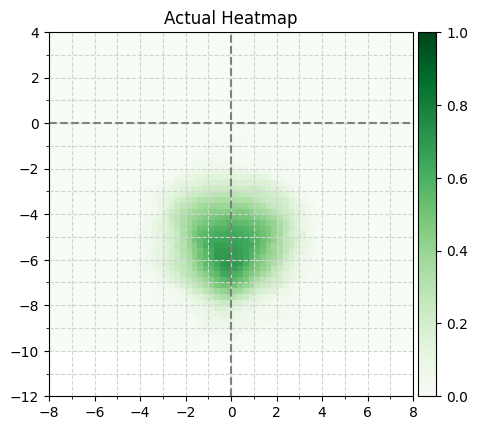

In [21]:
plot_heatmap(df_pocket_query)
plt.gcf().savefig(f"{FIGPATH}/figure_09.png")
plt.show()

### Appendix

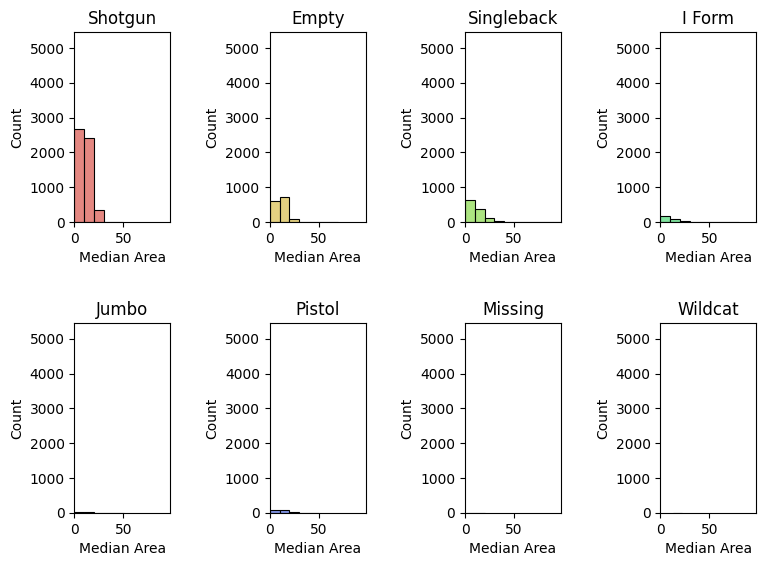

In [22]:
formations = list(df_play_metrics["offenseFormation"].unique())
plot_all_formation_distributions = get_all_formation_distributions_plotter(df_play_metrics, formations)
plot_all_formation_distributions(default_area)
plt.gcf().savefig(f"{FIGPATH}/appendix_01.png")
plt.show()

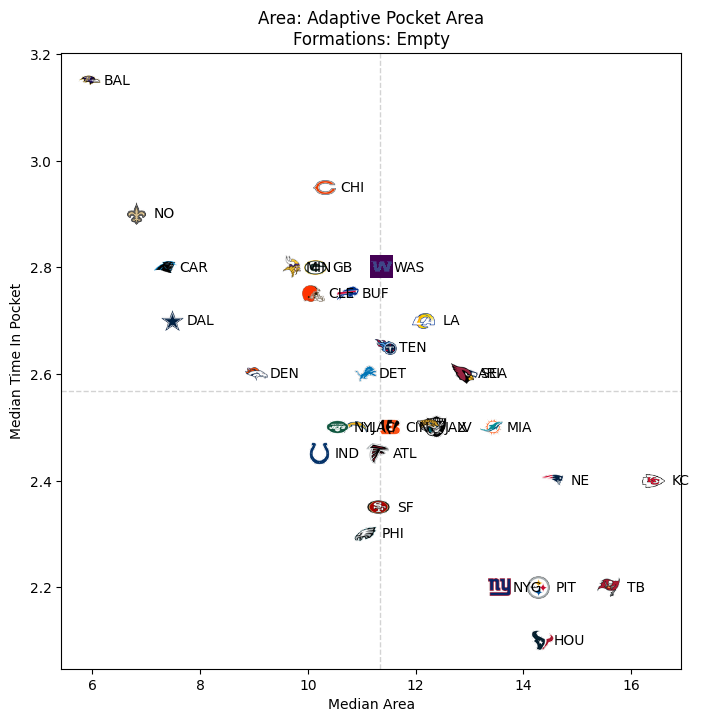

In [23]:
plot_team_scatter(default_area, "'EMPTY'", "median_area", "median_time_in_pocket")
plt.gcf().savefig(f"{FIGPATH}/appendix_02.png")
plt.show()